## 본 공부내용은 cnn layer들의 학습 시 layer의 모습을 시각화하는 공부입니다. 
### 본 코드 학습을 통해, layer들이 깊어짐에 따라 layer들의 학습 결과를 확인할 수 있습니다.

In [11]:
import tensorflow as tf 
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels) , (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(-1, 28,28,1)
test_images = test_images.reshape(-1, 28,28,1)

In [4]:
training_images.shape

(60000, 28, 28, 1)

In [5]:
test_images.shape

(10000, 28, 28, 1)

In [6]:
training_images , test_images = training_images / 255.0, test_images / 255.0

In [7]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.2), # keras는 자동으로 dropout 해제된다. (only done while training)
        tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(), # tf.keras.layers.GlobalAveragePooling2D
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model 

In [8]:
model = create_model()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0

In [10]:
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.4769 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3222 - accuracy: 0.8820
Epoch 3/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.2796 - accuracy: 0.8963
Epoch 4/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2489 - accuracy: 0.9068
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2298 - accuracy: 0.9143
Epoch 6/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2092 - accuracy: 0.9216
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1940 - accuracy: 0.9252
Epoch 8/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1768 - accuracy: 0.9329
Epoch 9/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1616 - accuracy: 0.9388
Epoch 10/10
1875/1875 [==============================] - 36s 19m

In [12]:
test_loss , test_accuracy = model.evaluate(test_images, test_labels)
print(test_loss)
print(test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.2574 - accuracy: 0.9154
0.2573837339878082
0.9154000282287598


In [18]:
train_loss , train_accuracy = history.history['loss'],history.history['accuracy']

In [53]:
train_loss

t 0.2573837339878082


In [39]:
import numpy as np
import pandas as pd

{'loss': [0.47688835859298706, 0.3221968710422516, 0.2795881927013397, 0.24889162182807922, 0.2297859936952591, 0.20918434858322144, 0.19400560855865479, 0.1767755001783371, 0.16159993410110474, 0.15066976845264435], 'accuracy': [0.8250333070755005, 0.8820000290870667, 0.8963333368301392, 0.9067833423614502, 0.9142666459083557, 0.9216166734695435, 0.9251833558082581, 0.9328500032424927, 0.9387833476066589, 0.9425166845321655]}
   accuracy    test
0  0.825033  0.9154
1  0.882000  0.9154
2  0.896333  0.9154
3  0.906783  0.9154
4  0.914267  0.9154
5  0.921617  0.9154
6  0.925183  0.9154
7  0.932850  0.9154
8  0.938783  0.9154
9  0.942517  0.9154
   accuracy    test
0  0.825033  0.9154
1  0.882000  0.9154
2  0.896333  0.9154
3  0.906783  0.9154
4  0.914267  0.9154
5  0.921617  0.9154
6  0.925183  0.9154
7  0.932850  0.9154
8  0.938783  0.9154
9  0.942517  0.9154


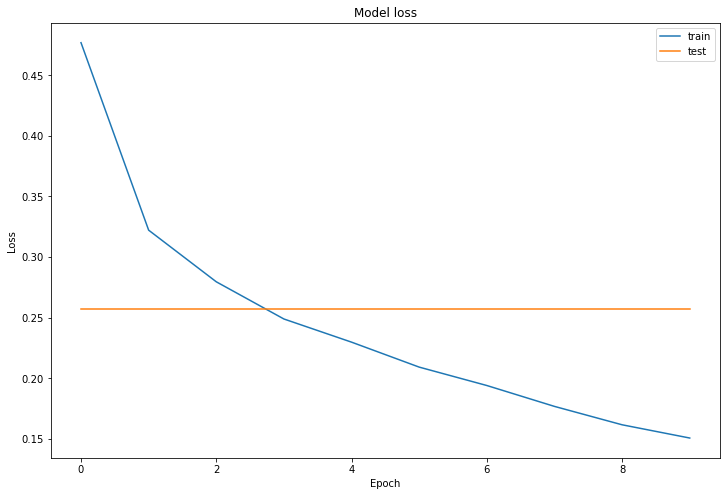

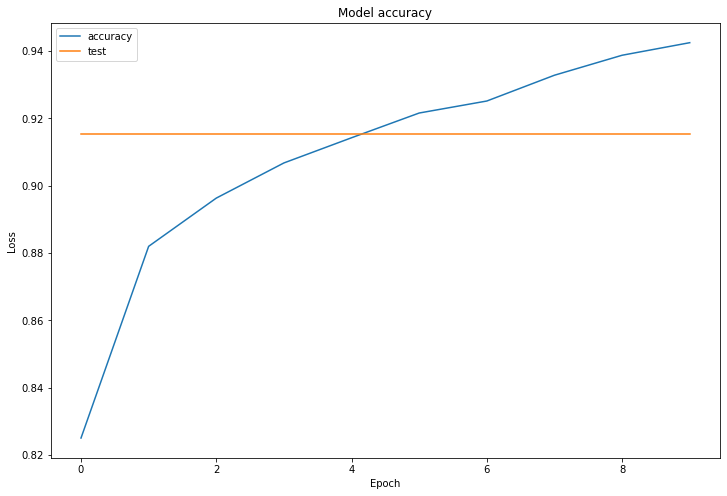

In [52]:
data = history.history 
print(data)
df_loss = pd.DataFrame(data)
# print(df_loss)

df_loss.rename(columns = {'loss':'train'},inplace=True)
df_loss['test'] = test_loss 
# print(df_loss)

df_accuracy = pd.DataFrame(df_loss['accuracy'])
df_loss.drop(columns='accuracy',inplace=True)
df_accuracy['test'] = test_accuracy

# df_accuracy.rename(columns={'accuracy':'train','val_accuracy':'validation'})
df_loss[['train','test']].plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss') # 특정 column만 뽑아서 plot 가능
df_accuracy[['accuracy','test']].plot(title='Model accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
print(df_accuracy)

### 아래 코드가 본 공부의 핵심이다.
1. layer_outputs 로 모델의 출력층을 모두 가져오고, activation model을 만들어 activation model에서 출력층에 접근할 수 있도록 했다.
2. 3가지의 이미지 (임의의)에 대한 학습 filter 모습을 출력하는 것이다.   

1/1 [==============================] - 0s 19ms/step


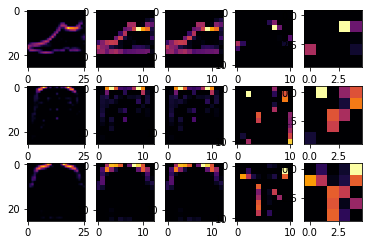

In [57]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,5) 	

FIRST_IMAGE=0					
SECOND_IMAGE=10					
THIRD_IMAGE=40
CONVOLUTION_NUMBER = 10 # filter 중 10번째 filter가 어떤 feature를 추출하는지 확인 			


layer_outputs = [layer.output for layer in model.layers] # outputs들을 다 찾아서 activation_model에서 각 layer의 출력층에 접근할 수 있도록 합니다! 
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,5):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)